In [33]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl

mpl.style.use('report_style.mplstyle')

In [34]:
prop_committed = 0.03
betas = np.linspace(0, 1, 50)
ensemble_size =  5
run_length = 10**4
f = 0.3
prop_committed_B = f*prop_committed
prop_committed_C = (1-f)*prop_committed
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [35]:
for social_structure in social_structures[-1:]:
    for beta in betas:
        run_ensemble_experiment(prop_committed_B,prop_committed_C , beta, beta, ensemble_size, run_length, social_structure)

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


# Plotting

In [31]:
social_structure = 'Thiers13'

Astar_list = []
Astar25_list = []
Astar75_list = []
Bstar_list = []
Bstar25_list = []
Bstar75_list = []
Cstar_list =[]
Cstar25_list = []
Cstar75_list = []

for beta in betas:
    beta_non_committed = beta
    beta_committed = beta
    fname = f'{social_structure}_B={prop_committed_B}_C={prop_committed_C}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'

    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

    print(f'loaded data: {beta}')

    A_data = data[0::4,:]
    B_data = data[1::4,:]
    C_data = data[2::4,:]
    Mixed_data = data[3::4,:]

    N = A_data[0,0]+B_data[0,0]+C_data[0,0]+Mixed_data[0,0]

    A_data = A_data/N
    B_data = B_data/N
    C_data = C_data/N
    Mixed_data = Mixed_data/N
    
    #print(type(A_data))
    
    # ONE NEEDS TO THINK OF A MORE EFFICIENT WAY TO DO THE CALCULATIONS
    #A_data has to be choosen from indexes as it is not 1 d
    print(A_data.T.shape)
    
    indices = np.random.choice(np.arange(run_length - 5*10**2, run_length, 1), size = 100, replace = False)
    
    A_data = A_data.T[indices]
    
    A_data = np.mean(A_data, axis = 0)
    
    Astar_list.append(np.median(A_data))
    Astar25_list.append(np.percentile(A_data, 25))
    Astar75_list.append(np.percentile(A_data, 75))
    
    indices = np.random.choice(np.arange(run_length - 5*10**2, run_length, 1), size = 100, replace = False)
    
    B_data = B_data.T[indices]
    
    B_data = np.mean(B_data, axis = 0)
    
    Bstar_list.append(np.median(B_data))
    Bstar25_list.append(np.percentile(B_data, 25))
    Bstar75_list.append(np.percentile(B_data, 75))
    
    indices = np.random.choice(np.arange(run_length - 5*10**2, run_length, 1), size = 100, replace = False)
    
    C_data = C_data.T[indices]
    
    C_data = np.mean(C_data, axis = 0)
    
    Cstar_list.append(np.median(C_data))
    Cstar25_list.append(np.percentile(C_data, 25))
    Cstar75_list.append(np.percentile(C_data, 75))




loaded data: 0.0
(50000, 1)
loaded data: 0.034482758620689655
(50000, 1)
loaded data: 0.06896551724137931
(50000, 1)
loaded data: 0.10344827586206896
(50000, 1)
loaded data: 0.13793103448275862
(50000, 1)
loaded data: 0.1724137931034483
(50000, 1)
loaded data: 0.20689655172413793
(50000, 1)
loaded data: 0.24137931034482757
(50000, 1)
loaded data: 0.27586206896551724
(50000, 1)
loaded data: 0.3103448275862069
(50000, 1)
loaded data: 0.3448275862068966
(50000, 1)
loaded data: 0.3793103448275862
(50000, 1)
loaded data: 0.41379310344827586
(50000, 1)
loaded data: 0.4482758620689655
(50000, 1)
loaded data: 0.48275862068965514
(50000, 1)
loaded data: 0.5172413793103449
(50000, 1)
loaded data: 0.5517241379310345
(50000, 1)
loaded data: 0.5862068965517241
(50000, 1)
loaded data: 0.6206896551724138
(50000, 1)
loaded data: 0.6551724137931034
(50000, 1)
loaded data: 0.6896551724137931
(50000, 1)
loaded data: 0.7241379310344828
(50000, 1)
loaded data: 0.7586206896551724
(50000, 1)
loaded data: 0.7

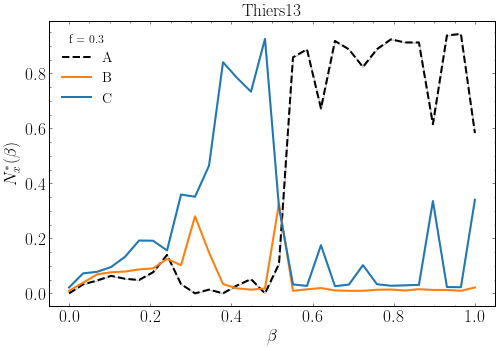

In [32]:
plt.figure(1)
plt.plot(betas, Astar_list, color='k', linestyle='--', label='A')
plt.fill_between(betas, Astar25_list, Astar75_list, color='k', alpha=0.2)

plt.plot(betas, Bstar_list, color='tab:orange', label='B')
plt.fill_between(betas, Bstar25_list, Bstar75_list, color='tab:orange', alpha=0.2)

plt.plot(betas, Cstar_list, color='tab:blue', label='C')
plt.fill_between(betas, Cstar25_list, Cstar75_list, color='tab:blue', alpha=0.2)

plt.legend(title=f'f = {f}')
plt.title(f'{social_structure}')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N^{\ast}_{x}(\beta)$')
plt.savefig(f'figures/fig3b_{social_structure}_{prop_committed}_{run_length}_{ensemble_size}.pdf')
plt.show()

In [ ]:
prop_committed = 0.03
betas = np.linspace(0, 1, 50)
ensemble_size =  1
run_length = 10**5
fs = np.linspace(0, 0.5, 10)
prop_committed_B = f*prop_committed
prop_committed_C = (1-f)*prop_committed
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [ ]:
for social_structure in social_structures[-1:]:
    for beta in betas:
        for f in fs:
            prop_committed_B = f*prop_committed
            prop_committed_C = (1-f)*prop_committed
            run_ensemble_experiment(prop_committed_B,prop_committed_C , beta, beta, ensemble_size, run_length, social_structure)

In [ ]:
social_structure = 'Thiers13'

Astar_list = []
Astar25_list = []
Astar75_list = []
Bstar_list = []
Bstar25_list = []
Bstar75_list = []
Cstar_list =[]
Cstar25_list = []
Cstar75_list = []

for f in fs:
    Astar_list = []
    Astar25_list = []
    Astar75_list = []
    Bstar_list = []
    Bstar25_list = []
    Bstar75_list = []
    Cstar_list =[]
    Cstar25_list = []
    Cstar75_list = []
    for beta in betas:
        beta_non_committed = beta
        beta_committed = beta
        fname = f'{social_structure}_B={prop_committed_B}_C={prop_committed_C}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'

        data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

        print(f'loaded data: {beta}')

        A_data = data[0::4,:]
        B_data = data[1::4,:]
        C_data = data[2::4,:]
        Mixed_data = data[3::4,:]

        N = A_data[0,0]+B_data[0,0]+C_data[0,0]+Mixed_data[0,0]

        A_data = A_data/N
        B_data = B_data/N
        C_data = C_data/N
        Mixed_data = Mixed_data/N

        #print(type(A_data))

        # ONE NEEDS TO THINK OF A MORE EFFICIENT WAY TO DO THE CALCULATIONS
        #A_data has to be choosen from indexes as it is not 1 d
        print(A_data.T.shape)

        indices = np.random.choice(np.arange(run_length - 5*10**2, run_length, 1), size = 100, replace = False)

        A_data = A_data.T[indices]

        A_data = np.mean(A_data, axis = 0)

        Astar_list.append(np.median(A_data))
        Astar25_list.append(np.percentile(A_data, 25))
        Astar75_list.append(np.percentile(A_data, 75))

        indices = np.random.choice(np.arange(run_length - 5*10**2, run_length, 1), size = 100, replace = False)

        B_data = B_data.T[indices]

        B_data = np.mean(B_data, axis = 0)

        Bstar_list.append(np.median(B_data))
        Bstar25_list.append(np.percentile(B_data, 25))
        Bstar75_list.append(np.percentile(B_data, 75))

        indices = np.random.choice(np.arange(run_length - 5*10**2, run_length, 1), size = 100, replace = False)

        C_data = C_data.T[indices]

        C_data = np.mean(C_data, axis = 0)

        Cstar_list.append(np.median(C_data))
        Cstar25_list.append(np.percentile(C_data, 25))
        Cstar75_list.append(np.percentile(C_data, 75))



In [ ]:
'''
To be used to plot the stopping time after sufficient stats are simulated!
'''


social_structure = 'Thiers13'
plt.figure(1)

fname = f'{social_structure}_equilibrium_state_beta_p={prop_committed}_{run_length}_{ensemble_size}.csv'
df = pd.read_csv(f'eq_time_stats/{fname}')

plt.plot(df['f'],df['equilibrium_time'],color='tab:blue', linestyle='-',label='A')



plt.fill_between(df['f'],df['equilibrium_time25'], df['equilibrium_time75'], color='tab:blue', alpha=0.2)



plt.legend(title=f'{social_structure} $beta=0.4$')
plt.title(f'{social_structure}')
plt.xlabel('f')
plt.ylabel('Time when $N_A=0$')
plt.show()

